c:\users\emma kray\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


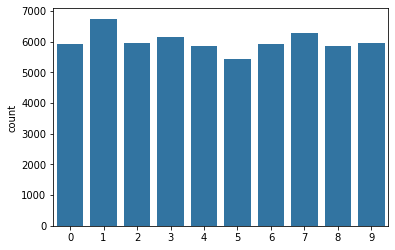

In [1]:
import seaborn as sns
import pickle
with open('data/train_points.p', 'rb') as f:
    X = pickle.load(f)
labels = X[:,0]
values = X[:,1:]
sns.countplot(labels, color = sns.color_palette()[0]);

In [2]:
with open('data/test_points.p', 'rb') as f:
    Y = pickle.load(f)
testvalues = Y[:,1:]
testlabels = Y[:,0]
testvalues.shape

(10000, 784)

![pickleUrl](https://media1.tenor.com/images/1756eb5631ade0eb64d57d256a5847f2/tenor.gif)

In [3]:
from scipy.stats import mode
k=100
def predict(x):
    differences = (values - x)
    distances = np.einsum('ij, ij->i', differences, differences)
    nearest = labels[np.argsort(distances)[:k]]
    return mode(nearest)[0][0]

In [4]:
sample = 100
predicted_value = predict(x=testvalues[sample,:])
labeled_value = testlabels[sample]
print(predicted_value, 'vs', labeled_value)

NameError: name 'np' is not defined

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
def I_turned_myself_into_a_pickle_morty(data,new_data_location):
    X = np.genfromtxt(data, delimiter=',').astype(np.dtype('uint8'))
    with open(new_data_location, 'wb') as f:
        pickle.dump(X, f)
    ...
    with open(new_data_location, 'rb') as f:
        X = pickle.load(f)
def do_pca(n_components, data): #does pca + data standardization I think?
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca
def load_the_training_pickle(pickleddata):
    with open(pickleddata, 'rb') as f:
        X = pickle.load(f)
    global trainlabels
    trainlabels = X[:,0]
    global trainvalues
    trainvalues = X[:,1:]
def load_the_testing_pickle(pickleddata):
    with open(pickleddata, 'rb') as f:
        Y = pickle.load(f)
    global testvalues
    testvalues = Y[:,1:]
    global testlabels
    testlabels = Y[:,0]
def predict(x):
    differences = (trainvalues_pca - x)
    distances = np.einsum('ij, ij->i', differences, differences)
    nearest = trainlabels[np.argsort(distances)[:k]]
    return mode(nearest)[0][0]

#K + Anzahl der Hauptkomponenten festlegen:
k=105
hit = 0
miss = 0

load_the_training_pickle('data/train_points.p')
load_the_testing_pickle('data/test_points.p')
#testing for perfect amount of PC's
hits_per_pcn = []
for r in range(1,30):
    hit = 0
    pca, testvalues_pca = do_pca(r,testvalues)
    pca, trainvalues_pca = do_pca(r,trainvalues)
    for i in range(2500,2750): #PCA helps a lot
        sample = i
        predicted_value = predict(x=testvalues_pca[sample,:])
        labeled_value = testlabels[sample]
        if predicted_value == labeled_value:
            hit +=1
    hits_per_pcn.append(hit)
plt.plot(hits_per_pcn)
plt.show()

KeyboardInterrupt: 

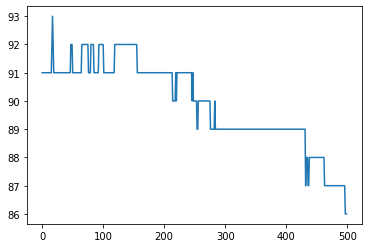

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
def I_turned_myself_into_a_pickle_morty(data,new_data_location):
    X = np.genfromtxt(data, delimiter=',').astype(np.dtype('uint8'))
    with open(new_data_location, 'wb') as f:
        pickle.dump(X, f)
    ...
    with open(new_data_location, 'rb') as f:
        X = pickle.load(f)
def do_pca(n_components, data): #does pca + data standardization I think?
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca
def load_the_training_pickle(pickleddata):
    with open(pickleddata, 'rb') as f:
        X = pickle.load(f)
    global trainlabels
    trainlabels = X[:,0]
    global trainvalues
    trainvalues = X[:,1:]
def load_the_testing_pickle(pickleddata):
    with open(pickleddata, 'rb') as f:
        Y = pickle.load(f)
    global testvalues
    testvalues = Y[:,1:]
    global testlabels
    testlabels = Y[:,0]
def predict(x):
    differences = (trainvalues_pca - x)
    distances = np.einsum('ij, ij->i', differences, differences)
    nearest = trainlabels[np.argsort(distances)[:k]]
    return mode(nearest)[0][0]

#K + Anzahl der Hauptkomponenten festlegen:
number_of_pcs = 8

hit = 0
miss = 0

load_the_training_pickle('data/train_points.p')
load_the_testing_pickle('data/test_points.p')

pca, testvalues_pca = do_pca(number_of_pcs,testvalues)
pca, trainvalues_pca = do_pca(number_of_pcs,trainvalues)

#trying to test for perfect amount of k's:
hits_per_k = []
for k in range(500,1000):
    hit=0
    for i in range(4880,5000): #PCA helps a lot
        sample = i
        predicted_value = predict(x=testvalues_pca[sample,:])
        labeled_value = testlabels[sample]
        if predicted_value == labeled_value:
            hit +=1
    hits_per_k.append(hit)
plt.plot(hits_per_k)
plt.show()


In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
with open('data/train_points.p', 'rb') as f:
    X = pickle.load(f)
trainlabels = X[:,0]
trainvalues = X[:,1:]

206


<Figure size 720x720 with 0 Axes>

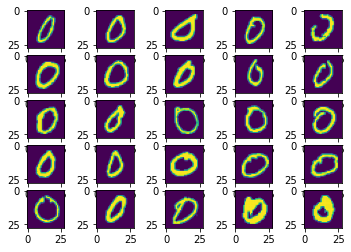

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
a = np.random.randint(0,59975)
b = a +25
fig = plt.figure()
for i in range (a,b):
    mat_data = xzerovalues[i,:].reshape(28,28)
    fig.add_subplot(5, 5, i-a+1)
    plt.imshow(mat_data)
print(a)
plt.show()

fig.savefig('test.jpg')

In [25]:
trainlabels[47317]

NameError: name 'trainlabels' is not defined

In [26]:
import pickle
import numpy as np
with open('data/train_points.p', 'rb') as f:
        X = pickle.load(f)

xsorted = X[X[:, 0].argsort()]
xsortvalue = np.delete(xsorted, 0, axis=1)
xzero = np.delete(xsorted, np.where(xsorted[:,0] != 0), axis= 0)
xzerovalues = np.delete(xzero, 0, axis=1)        

In [52]:
np.shape(xzerovalues)
np.shape(xsortvalue)

(60000, 784)

In [61]:
numbers = np.array([range(0,10), range(0,10)])
for i in range(0,10):
    xsorted = X[X[:, 0].argsort()]
    xi = np.delete(xsorted, np.where(xsorted[:,0] != i), axis=0)
    xiv = np.delete(xi, 0, axis=1)
    shape = np.shape(xiv)
    numbers[0 , i] = shape[0]

<BarContainer object of 10 artists>

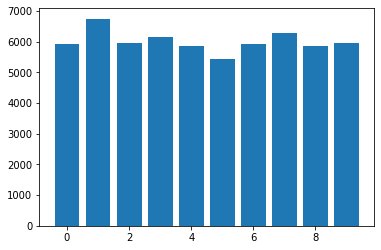

In [71]:
plt.bar(numbers[1], numbers[0])

In [20]:
x_sc = (train_values - np.mean(train_values, axis=0)) 
std = (np.std(train_values, axis=0))
sh = np.shape(std)[0]
for i in range(0, sh):
    if std[i,] != 0:
        x_sc[i,] = x_sc[i,]/np.std(train_values, axis=0)

<ipython-input-20-7c3794e4d9c7>:6: RuntimeWarning: invalid value encountered in true_divide
  x_sc[i,] = x_sc[i,]/np.std(train_values, axis=0)


KeyboardInterrupt: 

In [46]:
mean = np.mean(train_values, axis=0)
X_mean = train_values - mean
cov_mat = np.cov(X_mean, rowvar=0)
#cov_mat
corr_mat = np.corrcoef(X_mean,rowvar=False)
corr_mat[np.isnan(corr_mat)] = cov_mat[np.isnan(corr_mat)]
#np.shape(corr_mat)[0] * np.shape(corr_mat)[1]
corr_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
import numpy as np
import pickle
from functions.Load_data import load_the_pickle
from functions.PCA import PCA_func
from functions.KNN_predict import knn
#from functions.Standardize import center
#from functions.Standardize import center_test_values

# select number of principle components and k:
number_of_pcs = 45
k = 6

# loading data:
train_labels, train_values = load_the_pickle('data/train_points.p')
test_labels, test_values = load_the_pickle('data/test_points.p')


# PCA and standardization:
train_values_centered, train_mean = center(train_values)
train_values_pca, train_evs = PCA_func_mod(train_values_centered, train_mean, number_of_pcs)
test_values_centered, test_mean = center_test_values(test_values, train_values)
test_values_pca, _ = PCA_func_mod(test_values_centered,test_mean, number_of_pcs, train_evs=train_evs)

# kNN:
hit = 0
miss = 0

for i in range(100):
    sample = i
    predicted_value = knn(trainvalues_pca=train_values_pca, X=test_values_pca[sample, :], trainlabels=train_labels, k=k)
    labeled_value = test_labels[sample]
    if predicted_value == labeled_value:
        hit += 1
    else:
        miss += 1
print(hit, 'vs', miss)

99 vs 1


In [94]:
def PCA_func_mod(centered_x, X_mean, num_components, train_evs = None):
    # eigen values
    eigen_values, eigen_vectors = np.linalg.eigh(centered_x)
    # eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    # subset
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    # if we want to use the PCA that has been trained on the train set for the test set,
    # we want to use the eigenvector subset that has been calculated on the train set for classification
    # on the test set:
    if train_evs is not None:
        eigenvector_subset = train_evs
    X_reduced = np.dot(X_mean, eigenvector_subset)
    # we return X_reduced (the input reduced to num_components PCA),
    # the mean and the eigenvector subset (if we run the function for training, we need these for testing)
    return X_reduced, eigenvector_subset

In [95]:
def center(X, scale = False):
    mean = np.mean(X, axis = 0)
    X_mean = X - mean
    cov_mat = np.cov(X_mean, rowvar = 0)
    # c_mat = cov_mat
    if scale:
        corr_mat = np.corrcoef(X_mean, rowvar=False)
        corr_mat[np.isnan(corr_mat)] = cov_mat[np.isnan(corr_mat)]
        # c_mat = corr_mat
    return cov_mat if scale == False else corr_mat, X_mean

def center_test_values(X, Y):
    mean = np.mean(Y, axis =0)
    X_mean = X - mean
    cov_mat = np.cov(X_mean, rowvar = 0)
    return cov_mat, X_mean

In [80]:
train_labels, train_values = load_the_pickle('data/train_points.p')
c = train_values - np.mean(train_values, axis = 0)

In [81]:
np.sum((np.cov(train_values, rowvar = 0) != np.cov(c, rowvar = 0)))

488921

In [83]:
matric = np.array([[12,0,8],[12,0,8], [6,0,4]])
matricc = matric.T
#print(np.corrcoef(matric, rowvar=0))
mathew = matric - np.mean(matric)
#print(np.corrcoef(mathew, rowvar=0))
print(mathew)
print(matric)

[[ 6.44444444 -5.55555556  2.44444444]
 [ 6.44444444 -5.55555556  2.44444444]
 [ 0.44444444 -5.55555556 -1.55555556]]
[[12  0  8]
 [12  0  8]
 [ 6  0  4]]


In [78]:
def correy(mat):
    x = len(mat)
    c = (1/(x))
    corrmat = np.zeros((x, x))
    for i in range(0, x):
        for j in range (0, x):
            corrmat[i,j] = c * np.dot(((mat[:,i] - np.mean(mat[:,i]))/ np.std(mat[:,i])) , ((mat[:,j] - np.mean(mat[:,j]))/ np.std(mat[:,j])))
        
    return corrmat

In [100]:
def covvey(mat):
    x = len(mat)
    c = (1/(x))
    covvmat = np.zeros((x, x))
    for i in range(0, x):
        for j in range (0, x):
            covvmat[i,j] = c * np.dot((mat[:,i] - np.mean(mat[:,i])) , (mat[:,j] - np.mean(mat[:,j])))
        
    return covvmat

In [102]:
print(correy(matric))
print(np.corrcoef(matric, rowvar=0))

[[ 1. nan  1.]
 [nan nan nan]
 [ 1. nan  1.]]
[[ 1. nan  1.]
 [nan nan nan]
 [ 1. nan  1.]]


<ipython-input-78-d56a16cd27c0>:9: RuntimeWarning: invalid value encountered in true_divide
  corrmat[i,j] = c * np.dot(((mat[:,i] - np.mean(mat[:,i]))/ np.std(mat[:,i])) , ((mat[:,j] - np.mean(mat[:,j]))/ np.std(mat[:,j])))
